In [1]:
import os
import platform
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

from PIL import Image
from numpy import ones
from numpy import zeros
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from sklearn.model_selection import train_test_split
from utils import helpers as H

In [2]:
os_system = platform.system()
os_system

'Windows'

In [3]:
print("TensorFlow version:", tf.__version__)
print("TensorFlow is installed at:", tf.__file__)

TensorFlow version: 2.10.1
TensorFlow is installed at: C:\Users\soure\anaconda3\envs\tf\lib\site-packages\tensorflow\__init__.py


In [4]:
model = load_model('..\\weights\\aug4best_MPcGAN_gen_150epochs.h5')
model.compile
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 131072)       13238272    ['input_8[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 50)        500         ['input_7[0][0]']                
                                                                                            

In [12]:
def calculate_density(Xs):
    return np.sum(Xs)

In [17]:
for num in range(9):
    Xs = []
    num_samples = 30
    for i in range(10):
        latent_points, label = H.generate_latent_points(100, num_samples)
        label = asarray([i] * num_samples)
        print(label)
        X  = model.predict([latent_points, label])
        Xs.append(X)
    Xs = np.array(Xs)
    # noirmailize to 0-1
    Xs = (Xs + 1) / 2.0
    
    # caluclate the density and sort the images by density
    # densities = []
    # for i in range(10):
    #     densities.append([])
    #     for j in range(num_samples):
    #         density = calculate_density(Xs[i][j])
    #         densities[i].append(density)
    # densities = np.array(densities)
    # # sort the images by density from lowest to highest
    # sorted_indices = np.argsort(densities, axis=1)
    # print(sorted_indices)
    
    
    densities = []
    for i in range(10):
        densities.append([])
        for j in range(num_samples):
            if not os.path.exists(f'..\\images\\generated_{num}\\class_{i}'):
                os.makedirs(f'..\\images\\generated_{num}\\class_{i}')
            plt.imsave(f'..\\images\\generated_{num}\\class_{i}\\class_{i}_img_{j}.png', Xs[i][j])
            densities[i].append(calculate_density(Xs[i][j]))
            print(f'..\\images\\generated_{num}\\class_{i}\\class_{i}_img_{j}.png')
    
    # get the top 3 images from each class with the lowest density
    img_indices = []
    for i in range(10):
        img_indices.append([])
        for j in range(3):
            img_indices[i].append(np.argmin(densities[i]))
            densities[i][img_indices[i][j]] = 1000000
    
    # save top 1, 2, 3 images from each class with the lowest density
    for i in range(10):
        for j in range(3):
            if not os.path.exists(f'..\\images\\generated_{num}\\class_{i}_top3'):
                os.makedirs(f'..\\images\\generated_{num}\\class_{i}_top3')
            plt.imsave(f'..\\images\\generated_{num}\\class_{i}_top3\\class_{i}_img_{j}.png', Xs[i][img_indices[i][j]])
            print(f'..\\images\\generated_{num}\\class_{i}_top3\\class_{i}_img_{j}.png')
            
            
    

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1/1 [==============================] - 0s 256ms/step
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1/1 [==============================] - 0s 16ms/step
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
1/1 [==============================] - 0s 14ms/step
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
1/1 [==============================] - 0s 14ms/step
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
1/1 [==============================] - 0s 14ms/step
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
1/1 [==============================] - 0s 14ms/step
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
1/1 [==============================] - 0s 15ms/step
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
1/1 [==============================] - 0s 13ms/step
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
1/1 [====================

In [29]:
# calculate the density of the four corners of the image from a radius
def calculate_density(Xs, radius):
    densities = []
    for i in range(10):
        densities.append([])
        for j in range(len(Xs[i])):
            density = 0
            for k in range(4):
                # shape is (128, 128, 3)
                # do the mask of the radius to get the corner
                mask = np.zeros((128, 128, 3))
                mask[:radius, :radius] = 1
                if k == 1:
                    mask[:radius, -radius:] = 1
                elif k == 2:
                    mask[-radius:, :radius] = 1
                elif k == 3:
                    mask[-radius:, -radius:] = 1
                # multiply the mask with the image to get the corner
                corner = Xs[i][j] * mask
                # calculate the density of the corner
                density += np.sum(corner)
            densities[i].append(density)
    return densities

In [19]:
# plot the images with the lowest density
def plot_images_densities(Xs, densities, img_indices, num=3):
    for i in range(10):
        for j in range(num):
            plt.subplot(10, num, 1 + i * num + j)
            plt.axis('off')
            plt.imshow(Xs[i][img_indices[i][j]])
            plt.title(f'Class {i} Density: {densities[i][img_indices[i][j]]}')
    # plt.savefig(f'..\\images\\generated_{num}_top3.png')
    plt.show()

157/157 [==============================] - 20s 127ms/step


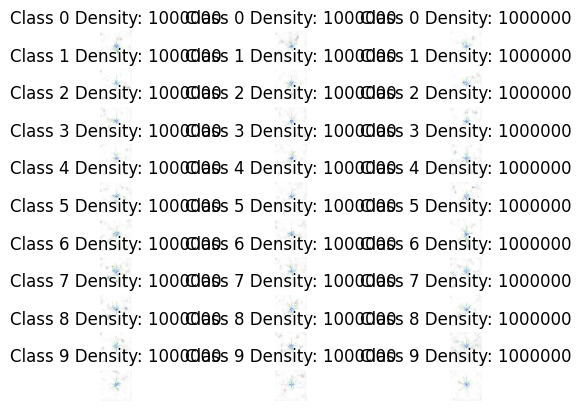

In [20]:
# generate 5000 images and calculate the density of the four corners of the image from a radius
Xs = []
num_samples = 5000
for i in range(10):
    latent_points, label = H.generate_latent_points(100, num_samples)
    label = asarray([i] * num_samples)
    X  = model.predict([latent_points, label])
    Xs.append(X)
Xs = np.array(Xs)
# noirmailize to 0-1
Xs = (Xs + 1) / 2.0
densities = calculate_density(Xs, 10)
# get the top 3 images from each class with the lowest density
img_indices = []
for i in range(10):
    img_indices.append([])
    for j in range(3):
        img_indices[i].append(np.argmin(densities[i]))
        densities[i][img_indices[i][j]] = 1000000
# plot the images with the lowest density
plot_images_densities(Xs, densities, img_indices)

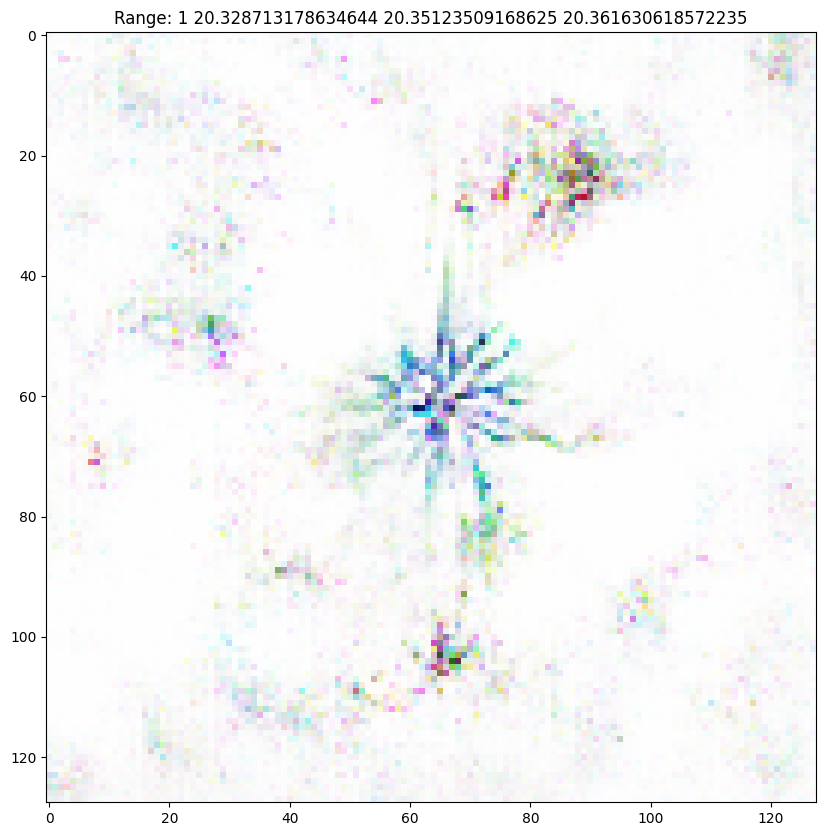

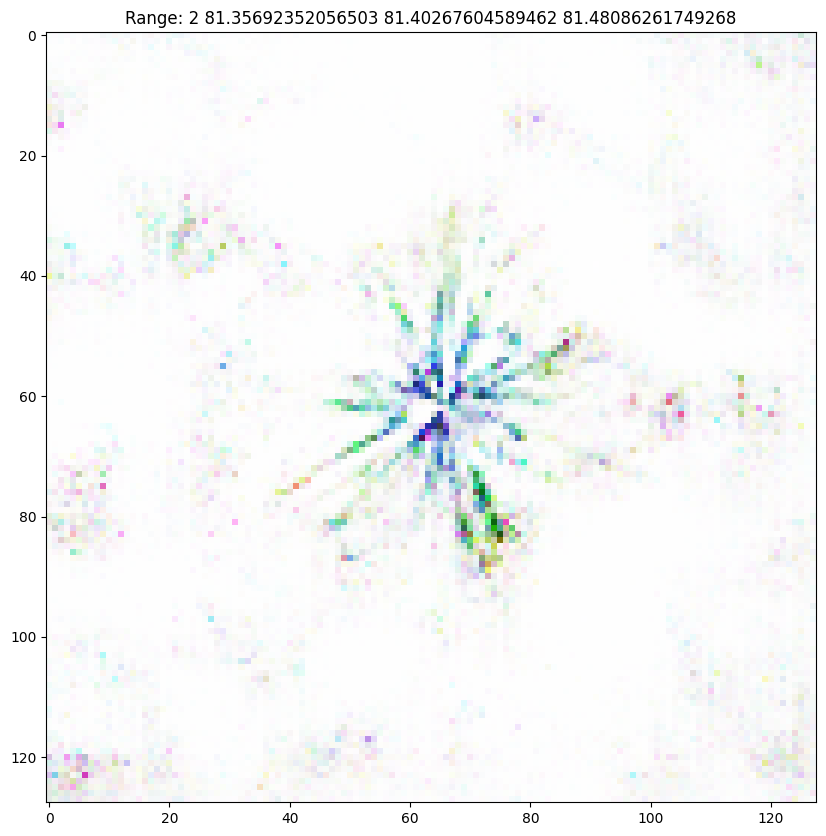

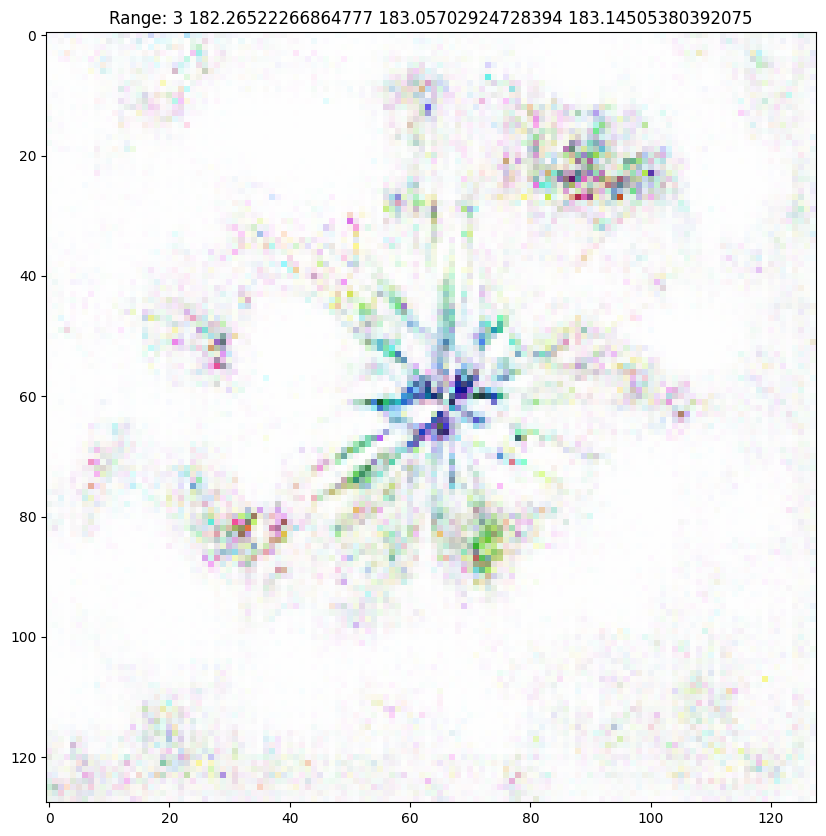

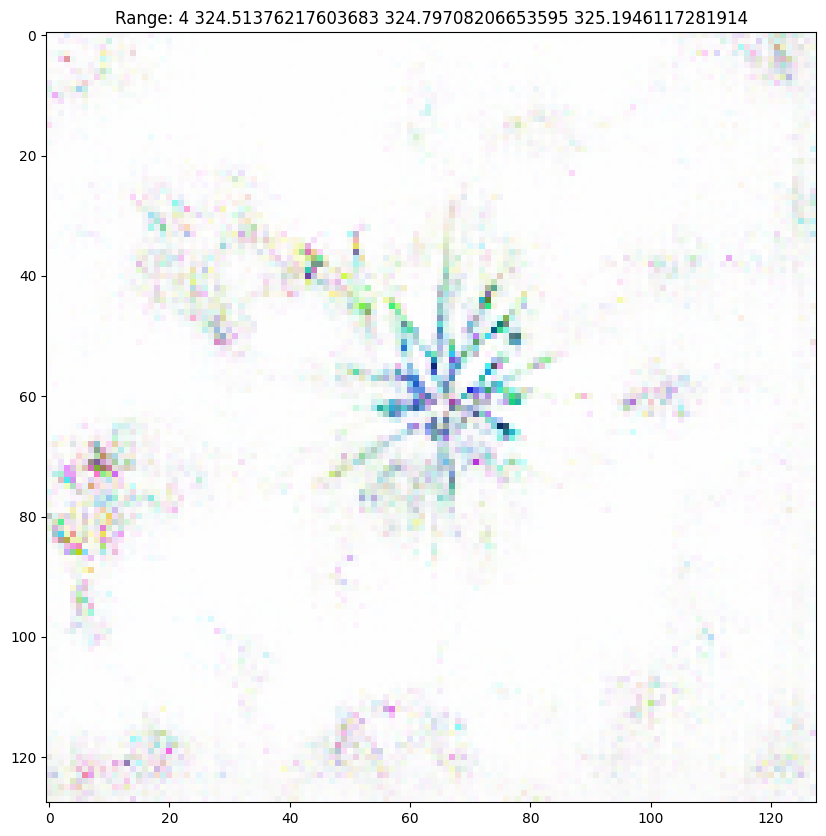

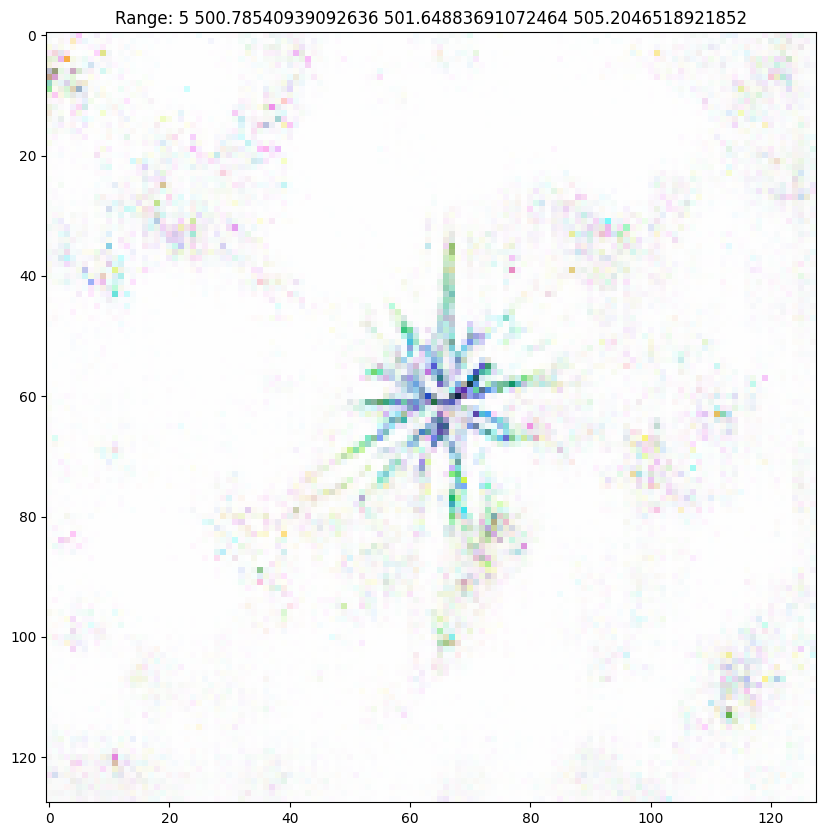

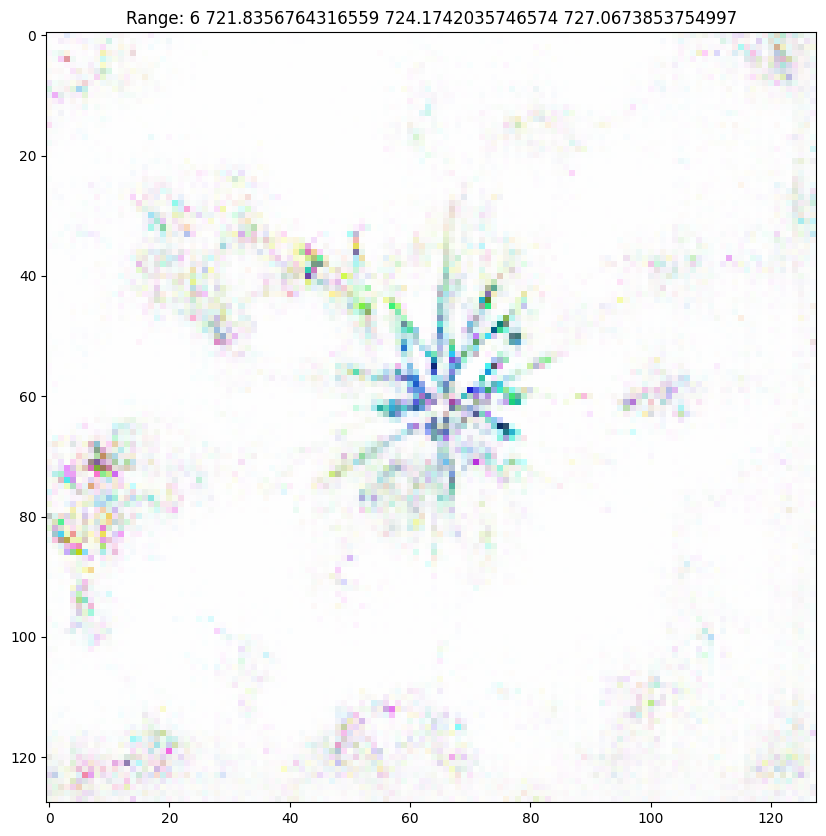

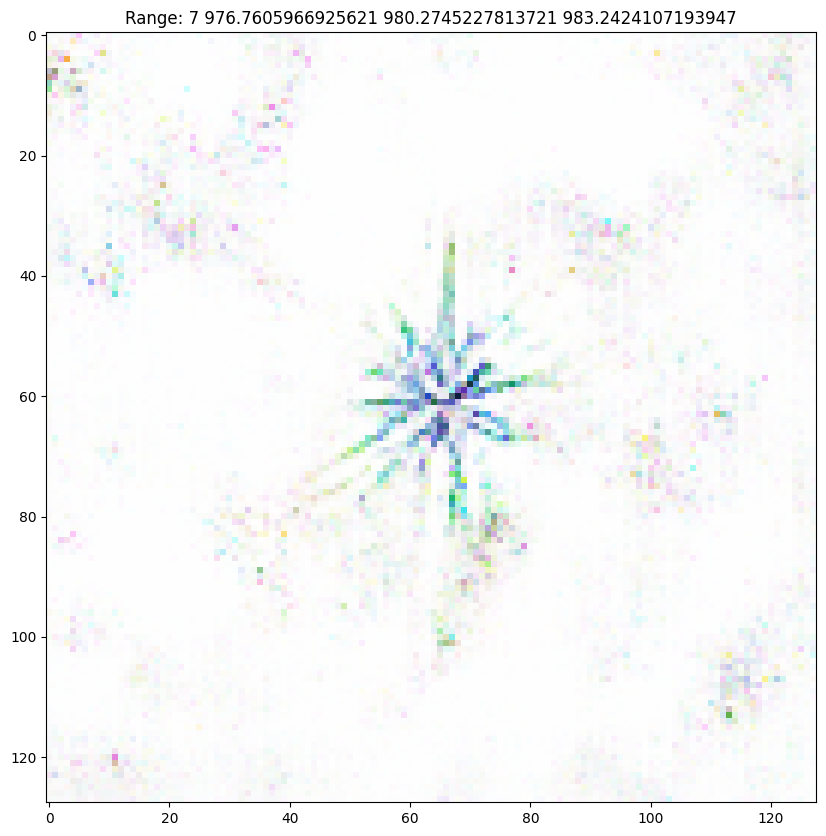

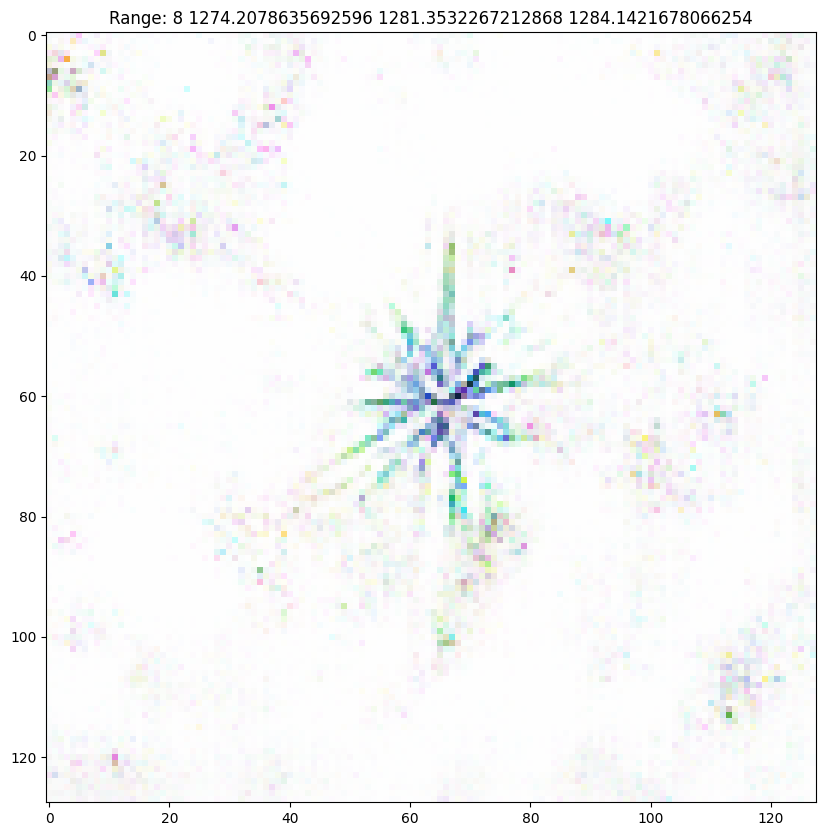

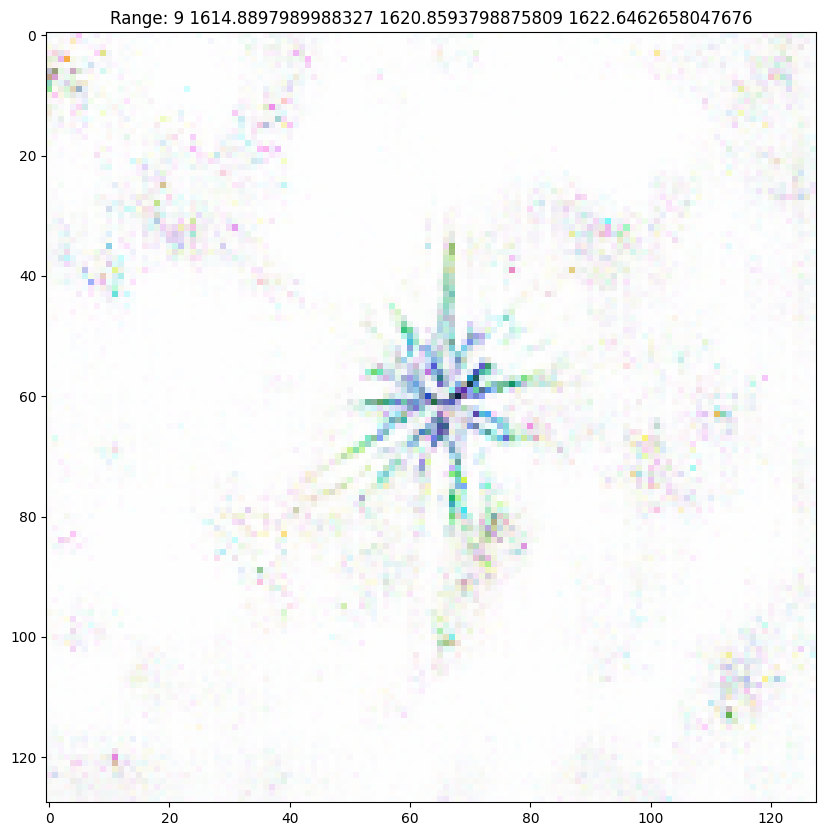

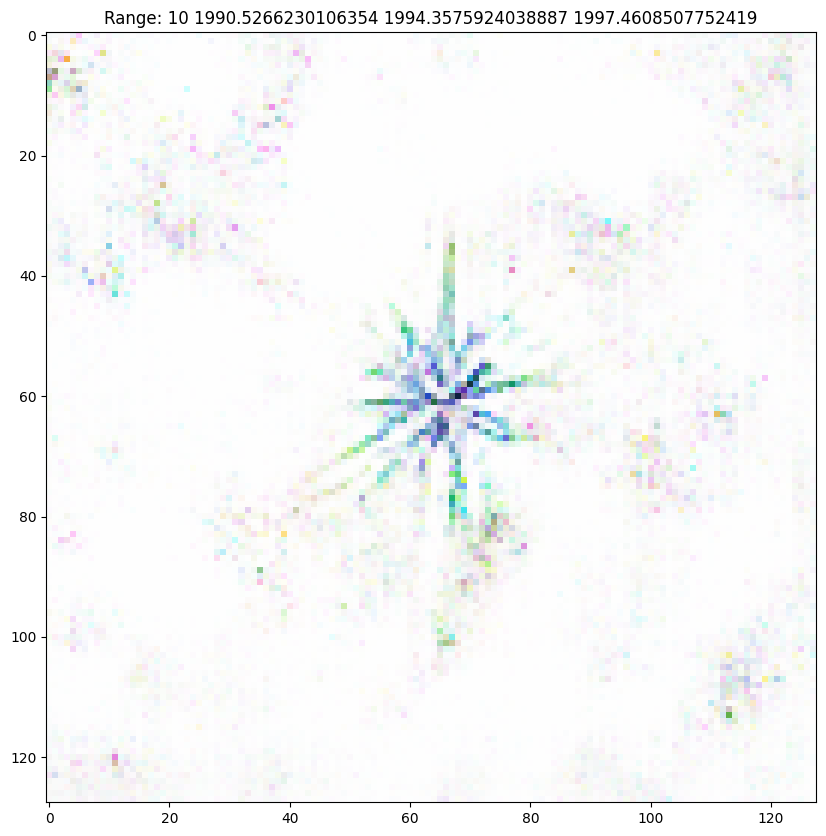

In [30]:
# calculate densities with various ranges
densities = []
for i in range(1, 11):
    densities.append(calculate_density(Xs, i))
# get the top 3 images from each class with the lowest density in each range
# without mutating the original densities
img_indices = []
temps = []
for r in range(10):
    img_indices.append([])
    temps.append([])
    for i in range(10):
        img_indices[r].append([])
        temps[r].append([])
        for j in range(3):
            img_indices[r][i].append(np.argmin(densities[r][i]))
            temps[r][i].append(densities[r][i][img_indices[r][i][j]])
            densities[r][i][img_indices[r][i][j]] = 1000000

for r in range(10):
    for i in range(10):
        for j in range(3):
            densities[r][i][img_indices[r][i][j]] = temps[r][i][j]          

# plot the images with the lowest density in each range
for r in range(10):
    plt.figure(figsize=(10, 10))
    plt.title(f'Range: {r+1} {densities[r][0][img_indices[r][0][0]]} {densities[r][0][img_indices[r][0][1]]} {densities[r][0][img_indices[r][0][2]]}')
    plt.imshow(Xs[0][img_indices[r][0][0]])
    plt.show()

In [90]:
from utils.generate_FID_IS import *

def load_and_preprocess_images(directory, size=(299, 299)):
    images = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)
            images.append(np.asarray(img))
    print(f'Loaded {len(images)} images from {directory}')
    # Normalize images to be between -1 and 1 to match the InceptionV3 preprocessing
    images = np.array(images).astype('float32')
    images = (images - 127.5) / 127.5
    return images

# Assuming Xs and img_indices are defined correctly


# Load ground truth images and preprocess
ground_truth_images = load_and_preprocess_images('..\\images\\FID_IS_groundtruth_299')

# Load model for FID calculation
model_I = tf.keras.applications.InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))

# Assuming Xs[0] is an array of generated images corresponding to a specific class
# and img_indices is structured to index these images, you need to preprocess these generated images similarly
# For the purpose of demonstration, let's directly use ground_truth_images for both sets in the FID calculation

# Calculate FID between two sets of images
# This is just a placeholder to demonstrate the process. In practice, you should compare two different sets of images.
fid_value = calculate_fid(model_I, ground_truth_images, ground_truth_images)  # Replace one `ground_truth_images` with your generated images array

print(f'FID Value: {fid_value}')

Loaded 0 images from ..\images\FID_IS_groundtruth_299


ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [45]:
densities = calculate_density(Xs, 2)

In [52]:
print(len(densities))
# from Xs and img indices, get the top n images from each class with the lowest density
# given the classes numbers
counts = {
        "cellulosic": 19,
        "polyacetal": 5,
        "polyamide": 19,
        "polyethylene": 26,
        "polyethylene_ter": 16,
        "polypropylene": 20,
        "polystyrene": 17,
        "polyurethane": 27,
        "polyvynylchloride": 23,
        "silica": 38
    }

img_indices = []
temps = []
for idx, (c, cc)  in enumerate(counts.items()):
    img_indices.append([])
    temps.append([])
    for i in range(cc):
        img_indices[-1].append(np.argmin(densities[idx]))
        temps[-1].append(densities[idx][img_indices[-1][i]])
        densities[idx][img_indices[-1][i]] = 1000000
        
for idx, (c, cc)  in enumerate(counts.items()):
    for i in range(cc):
        densities[idx][img_indices[idx][i]] = temps[idx][i]
print(img_indices)

10
[[3854, 3655, 3274, 1609, 4432, 4628, 1655, 4594, 1457, 1122, 3403, 3148, 1934, 1193, 856, 954, 4058, 1022, 1968], [2411, 1089, 4406, 710, 472], [4527, 3397, 2874, 2835, 685, 3131, 4370, 3288, 3957, 4072, 2949, 4911, 870, 1208, 4307, 1416, 4873, 1609, 974], [3507, 462, 1038, 4437, 2591, 3256, 206, 369, 4124, 2457, 3976, 2045, 3529, 4981, 200, 821, 4015, 920, 3592, 1484, 3982, 1603, 1983, 2653, 4188, 3749], [4261, 3962, 3180, 2916, 184, 2350, 3992, 1072, 3373, 4432, 1953, 1068, 3968, 2323, 3530, 4857], [4464, 2665, 3706, 1759, 431, 2013, 1607, 3564, 613, 1589, 75, 912, 4097, 2217, 1137, 197, 2289, 2864, 1495, 3790], [3126, 3991, 2644, 3876, 257, 3153, 1662, 399, 2499, 2682, 1815, 2046, 801, 3965, 4502, 4065, 2501], [2485, 412, 4921, 1644, 874, 4612, 2860, 3838, 3899, 2897, 4298, 525, 2613, 4348, 796, 3964, 3840, 3169, 413, 3520, 2070, 2002, 821, 484, 2947, 4241, 1351], [2797, 4119, 574, 1558, 4571, 528, 2436, 4041, 904, 31, 2093, 2444, 531, 2918, 1668, 1844, 4373, 3981, 3418, 1831, 1

In [80]:
def preprocess_images(images, size=(299, 299)):
    processed_images = []

    # Check if images have an extra leading dimension
    if images.ndim == 4:
        # Iterate over the first dimension (batch size)
        for img in images:
            # Ensure img is 3D (height, width, channels)
            if img.ndim == 3:
                # Convert to PIL Image, resize, and normalize
                img = Image.fromarray((img * 255).astype(np.uint8))
                img = img.resize(size)
                img = np.asarray(img).astype('float32')
                img = (img - 127.5) / 127.5
                processed_images.append(img)
    else:
        # Handle single image case
        img = images
        if img.ndim == 3:
            img = Image.fromarray((img * 255).astype(np.uint8))
            img = img.resize(size)
            img = np.asarray(img).astype('float32')
            img = (img - 127.5) / 127.5
            processed_images.append(img)

    return np.array(processed_images)

In [81]:
# get the top class images from Xs
top_images = []
for idx, (c, cc)  in enumerate(counts.items()):
    top_images.append([])
    for i in range(cc):
        top_images[-1].append(Xs[idx][img_indices[idx][i]])
# flatten the list
top_images = [item for sublist in top_images for item in sublist]

top_images = np.array(top_images)
top_images_processed = preprocess_images(top_images)
top_images_processed.shape

(210, 299, 299, 3)

In [77]:
calculate_fid(model_I, ground_truth_images, top_images_processed)

7/7 [==============================] - 1s 83ms/step


6.999202319305638e+101

In [83]:
# save all the top_images_processed 
for idx, (c, cc)  in enumerate(counts.items()):
    for i in range(cc):
        if not os.path.exists(f'..\\images\\top_generated\\class_{c}_top3'):
            os.makedirs(f'..\\images\\top_generated\\class_{c}_top3')
        plt.imsave(f'..\\images\\top_generated\\class_{c}_top3\\class_{c}_img_{i}.png', (top_images_processed[i]+ 1)/2)
        print(f'..\\images\\top_generated\\class_{c}_top3\\class_{c}_img_{i}.png')

..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_0.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_1.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_2.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_3.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_4.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_5.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_6.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_7.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_8.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_9.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_10.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_11.png
..\images\top_generated\class_cellulosic_top3\class_cellulosic_img_12.png
..\images\top_generated\class_cellulosic_top3\cl

In [92]:
ground_truth_dir = '..\\images\\FID_IS_groundtruth_299'
FID_IS_DIR = "..\\images\\FID_IS_baseline_299"
fid = calculate_fid_for_directories(ground_truth_dir, FID_IS_DIR)
is_mean, is_std = calculate_is_for_directory(FID_IS_DIR)
print(f'FID: {fid}, IS Mean: {is_mean}, IS Std: {is_std}')

7/7 [==============================] - 2s 129ms/step
FID: 7.615132123404534e+103, IS Mean: 1.1281421184539795, IS Std: 0.019837742671370506


In [34]:
import os
import numpy as np
import cv2 as cv
from PIL import Image

def load_and_preprocess_images(directory, size=(299, 299)):
    images = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)
            images.append(np.asarray(img))
    print(f'Loaded {len(images)} images from {directory}')
    images = np.array(images).astype('float32')
    images = (images - 127.5) / 127.5
    return images

def postprocess_images(images):
    images = (images + 1) / 2.0 * 255  # Scale images to 0-255 range
    images = images.astype('uint8')  # Convert to uint8 for OpenCV processing
    processed_images = []
    for img in images:
        # Create a mask that is True (1) for the areas we want to keep unchanged (corners)
        mask_size = 50  # Size of each corner that remains unchanged
        mask = np.ones(img.shape[:2], dtype=np.uint8)  # Create a mask for the whole image
        # Set the corners of the mask to 0 (these areas will remain unchanged)
        mask[:mask_size, :mask_size] = 0
        mask[:mask_size, -mask_size:] = 0
        mask[-mask_size:, :mask_size] = 0
        mask[-mask_size:, -mask_size:] = 0

        # Denoise the entire image
        denoised_img = cv.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

        # Apply the mask to keep the corners of the original image unchanged
        for c in range(3):  # Iterate over the color channels
            denoised_img[:,:,c] = denoised_img[:,:,c] * (1 - mask) + img[:,:,c] * mask

        processed_images.append(denoised_img)
    return np.array(processed_images)


# Example usage
directory = "../images/aug4best_MPcGAN_gen_150epochs.h5/top_generated"  # Use forward slashes or os.path.join for paths
images = load_and_preprocess_images(directory)
images = postprocess_images(images)

# If you want to display an image using Matplotlib:
import matplotlib.pyplot as plt

plt.imshow(images[2])
plt.show()


Loaded 210 images from ../images/aug4best_MPcGAN_gen_150epochs.h5/top_generated


KeyboardInterrupt: 

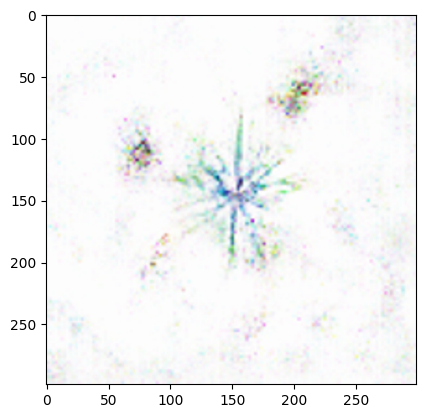

In [35]:
plt.imshow(images[2])

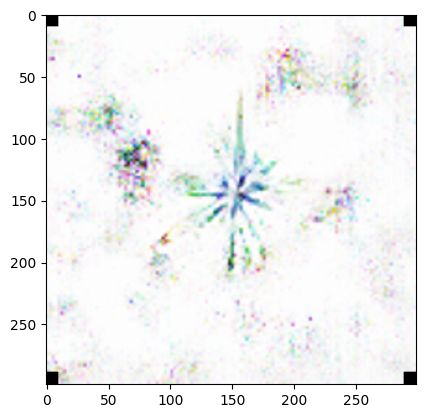

In [8]:
plt.imshow(prev_img[0])